In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import collections as mc
import random

In [2]:
def create_random_spanning_tree(g):
    tree = nx.create_empty_copy(g)
    num_nodes = g.number_of_nodes()
    visited = []
    node = list(g.nodes())[0]
    while len(visited) < num_nodes:
        if node not in visited:
            visited.append(node)
        neighbors = list(g.neighbors(node))
        possible_neighbors = [n for n in neighbors if n not in visited]
        if len(possible_neighbors) > 0:
            new_node = possible_neighbors[random.randint(0,len(possible_neighbors)-1)]
            tree.add_edge(node, new_node)
            node = new_node
        else:
            node = neighbors[random.randint(0,len(neighbors)-1)]
    return tree

def divide_into_two_districts(g):
    found = False
    while not found:
        tree = create_random_spanning_tree(graph)
        betweenness = nx.betweenness_centrality(tree)
        for k, v in sorted(betweenness.items(), key=lambda item: item[1], reverse=True)[:3]:
            if not found:
                for neighbor in tree.neighbors(k):
                    test = tree.copy()
                    chopped_edge = (k, neighbor)
                    test.remove_edge(k, neighbor)
                    groups = list(nx.connected_components(test))
                    if len(groups[0]) == len(groups[1]):
                        found = True
                        break
    districts = {}
    for i,group in enumerate(groups):
        for node in group:
            districts[node] = i
    return districts, tree, chopped_edge

def determine_boundary(groups,dim):
    starts = []
    ends = []
    s = None
    for x in range(dim):
        for y in range(dim):
            if x != dim-1 and groups[(x,y)] != groups[(x+1,y)]:
                starts.append((x+0.5,y-0.5))
                ends.append((x+0.5,y+0.5))
                if y == 0:
                    s = (x+0.5,y-0.5)
                elif y == dim-1:
                    s = (x+0.5,y+0.5)
            if y != dim-1 and groups[(x,y)] != groups[(x,y+1)]:
                starts.append((x-0.5,y+0.5))
                ends.append((x+0.5,y+0.5))
                if x == 0:
                    s = (x-0.5,y+0.5)
                elif x == dim-1:
                    s = (x+0.5,y+0.5)
    if s == None:
        s = starts[0]
    boundary_line = [s]
    while len(boundary_line) <= len(starts):
        possible_new_s = []
        if s in starts:
            indices = [i for i,n in enumerate(starts) if n == s]
            possible_new_s.extend([ends[i] for i in indices])
        if s in ends:
            indices = [i for i,n in enumerate(ends) if n == s]
            possible_new_s.extend([starts[i] for i in indices])
        new_s = [ns for ns in possible_new_s if ns not in boundary_line]
        if len(new_s) > 0:
            boundary_line.append(new_s[0])
            s = new_s[0]
        elif (len(boundary_line) == len(starts)) and (boundary_line[0] in possible_new_s):
            boundary_line.append(boundary_line[0])
        else:
            print("FAIL")
            break
    return boundary_line

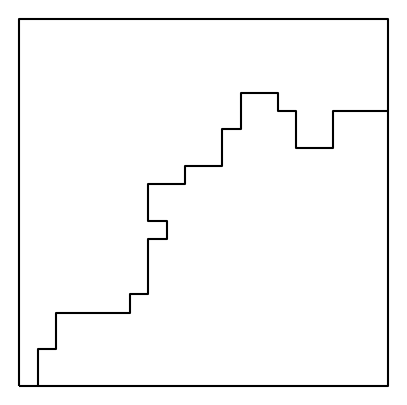

In [18]:
dim = 20
graph = nx.grid_2d_graph(dim, dim)
districts, tree, chopped_edge = divide_into_two_districts(graph)     
boundary = determine_boundary(districts, dim)

fig,ax = plt.subplots(figsize=(5,5))
boundary_line = mc.LineCollection([boundary], color="black")
ax.add_collection(boundary_line)
rim_line = mc.LineCollection([[(-0.5,-0.5),(dim-0.5,-0.5),(dim-0.5,dim-0.5),(-0.5,dim-0.5),(-0.5,-0.5)]], color="black")
ax.add_collection(rim_line)
plt.xlim(-1, 20)
plt.ylim(-1, 20)

ax.set_axis_off()
plt.savefig("examples/16.svg")

In [32]:
graph = nx.grid_2d_graph(8, 8)
tree = nx.create_empty_copy(graph)
print(tree)
for x in range(0,7):
    tree.add_edge((x,7), (x+1,7))
for y in range(0,7):
    tree.add_edge((7,y), (7,y+1))
for x in range(0,7):
    tree.add_edge((x,0), (x+1,0))
for y in range(0,6):
    tree.add_edge((0,y), (0,y+1))
for x in range(0,4):
    tree.add_edge((x,6), (x+1,6))
for x in range(1,6):
    for y in range(1,6):
        tree.add_edge((x,y), (x+1,y))
tree.add_edge((6,6), (5,6))
tree.add_edge((5,6), (4,6))
for y in range(1,6):
    tree.add_edge((6,y),(6,y+1))
    
for group in nx.connected_components(tree):
    print(group)
    
    
found = False
betweenness = nx.betweenness_centrality(tree)
for k, v in sorted(betweenness.items(), key=lambda item: item[1], reverse=True)[:3]:
    if not found:
        for neighbor in tree.neighbors(k):
            test = tree.copy()
            test.remove_edge(k, neighbor)
            groups = list(nx.connected_components(test))
            if len(groups[0]) == len(groups[1]):
                found = True
                break
districts = {}
for i,group in enumerate(groups):
    for node in group:
        districts[node] = i

Graph with 64 nodes and 0 edges
{(4, 0), (3, 4), (4, 3), (3, 1), (3, 7), (5, 4), (4, 6), (5, 1), (5, 7), (0, 2), (0, 5), (2, 2), (1, 0), (1, 6), (2, 5), (1, 3), (7, 4), (6, 2), (7, 1), (7, 7), (6, 5), (4, 2), (3, 0), (4, 5), (3, 3), (5, 0), (5, 6), (3, 6), (5, 3), (0, 1), (0, 7), (2, 4), (1, 2), (0, 4), (2, 1), (2, 7), (1, 5), (6, 1), (7, 0), (6, 4), (7, 3), (6, 7), (7, 6), (3, 2), (4, 1), (4, 7), (3, 5), (5, 2), (4, 4), (5, 5), (0, 0), (1, 1), (0, 3), (2, 0), (1, 4), (0, 6), (2, 3), (1, 7), (2, 6), (7, 2), (6, 0), (6, 6), (7, 5), (6, 3)}


In [52]:
boundary = determine_boundary(districts, 8)

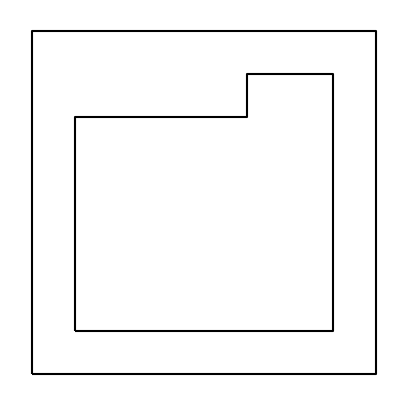

In [55]:
fig,ax = plt.subplots(figsize=(5,5))
boundary_line = mc.LineCollection([boundary], color="black")
ax.add_collection(boundary_line)
rim_line = mc.LineCollection([[(-0.5,-0.5),(8-0.5,-0.5),(8-0.5,8-0.5),(-0.5,8-0.5),(-0.5,-0.5)]], color="black")
ax.add_collection(rim_line)
plt.xlim(-1, 8)
plt.ylim(-1, 8)

ax.set_axis_off()
plt.savefig("example_district.svg")

In [57]:
dim = 20
graph = nx.grid_2d_graph(dim, dim)
districts = divide_into_two_districts(graph)     
boundary = determine_boundary(districts, dim)

fig,ax = plt.subplots(figsize=(5,5))
#boundary_line = mc.LineCollection([boundary], color="black")
ax.add_collection(boundary_line)
rim_line = mc.LineCollection([[(-0.5,-0.5),(dim-0.5,-0.5),(dim-0.5,dim-0.5),(-0.5,dim-0.5),(-0.5,-0.5)]], color="black")
ax.add_collection(rim_line)
plt.xlim(-1, 20)
plt.ylim(-1, 20)

ax.set_axis_off()
plt.savefig("district.svg")


KeyboardInterrupt



In [85]:
xs = []
ys = []
cs = []
for node in districts:
    xs.append(node[0])
    ys.append(node[1])
    cs.append(districts[node])

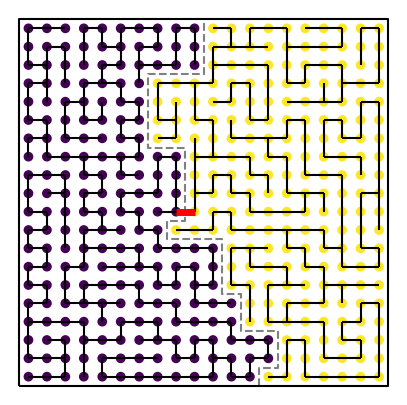

In [101]:
fig,ax = plt.subplots(figsize=(5,5))
plt.scatter(xs, ys, c=cs)
tree_edges = mc.LineCollection(tree.edges, color="black")
ax.add_collection(tree_edges)
boundary_line = mc.LineCollection([boundary], color="grey", linestyle="dashed")
ax.add_collection(boundary_line)
chopped = mc.LineCollection([chopped_edge], color="red", linewidth=5)
ax.add_collection(chopped)
rim_line = mc.LineCollection([[(-0.5,-0.5),(dim-0.5,-0.5),(dim-0.5,dim-0.5),(-0.5,dim-0.5),(-0.5,-0.5)]], color="black")
ax.add_collection(rim_line)
plt.xlim(-1, 20)
plt.ylim(-1, 20)

ax.set_axis_off()
plt.savefig("tree_example.png")

SyntaxError: expected ':' (2627948303.py, line 1)